This scripts explore the data and creates a yaml file. 
The yaml file contains info about ... useful later on for
hot encoding and .. 

In [15]:
!pip3 install seaborn

    100% |████████████████████████████████| 215kB 2.1MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/19/74/e50234bc82c553fecdbd566d8650801e3fe2d6d8c8d940638e3d8a7c5522/pandas-0.24.2-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 25.2MB 59kB/s  eta 0:00:01    97% |███████████████████████████████▏| 24.5MB 9.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/87/2d/e4656149cbadd3a8a0369fcd1a9c7d61cc7b87b3903b85389c70c989a696/numpy-1.16.4-cp36-cp36m-manylinux1_x86_64.whl
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 13.1MB 122kB/s eta 0:00:01    86% |███████████████████████████▉    | 11.4MB 9.6MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-a

In [79]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yaml
sns.set()

In [3]:
with open("../extract/go_dictionary", "rb") as fp:
    go_dictionary=pickle.load(fp)

with open("../extract/proteins_goes", "rb") as fp:
    proteins_goes=pickle.load(fp)

with open("../extract/proteins_seqs", "rb") as fp:
    proteins_seqs=pickle.load(fp)

In [11]:
print('Number of unique goes:', len(go_dictionary))
print('Number of examples:', len(proteins_goes))
key=list(go_dictionary.keys())[0]
print('\nFirst go:\nkey: {} | value: {}'.format(key, go_dictionary[key]))
print('\nFirst sequence:\n'+proteins_seqs[0])

Number of unique goes: 45006
Number of examples: 560118

First go:
key: GO:0000001 | value: mitochondrion inheritance

First sequence:
MFKKVENKANFPKIEEKILKFWNDNKIFEKSMEQREGCEEFTFYDGPPFATGLPHFGHFVPNTIKDIIPRYQTMKGKYVKRNFGWDTHGLPVEYEVEKKLGISGKYEIENYGIENFNKECKKIVLRYTEEWKNIILRLGRWVDFEKGYKTMDISFMESVWWVFKNLYNKGLIYESYYVLPYSPKLATPLSNFEVNLGEYKEVNDPSLTIKFKIKDKNEYLLAWTTTPWTLPSNLGIAVGKEIEYSKIFDKKKEEILILGSKKINSYFDDENAYTIIEKFKGSQLQGIEYEPIFNYFLEQKDKGAFKVHTADYITTDDGTGIVHIAPFGEEDYRVLKKHTNVDIIDPLDAECKFTNRVKDFKGLFVKDADKKIIENLKLRNFLFKRENYLHRYPFCYRTNYPIIYRPISSWFVNVEKIKTQLLEVNEKINWMPAHLKKGRFGKWLENAKDWAISRNRFWGNPIPIWICSKTGKKICVGSRKELEELSGQKIEDLHKDKIDKITWPSKDGGTFIRTSEVLDCWFESGAMPYASNHYPFANESNFKNIFPADFIAEGLDQTRGWFYTLTILGTSLFENTAFKNVIVNGLVLSSDGRKMSKSFKNYTDPMEVINTFGADALRLYLIMSPVVKADDLKYSDNGVRDVLKNIIIPIWNAYSFFTTYAIIDKFKPTKNLSLVKSNNLDKWIISELESLKKILNKEIDKYNLTKSIESLLEFIDKLNNWYIRRSRRRFWKSENDKDKNDAYETLYYAIKTLMILLAPFIPFITEEIYQNLKTDEDKQSIHLNDYPKANENFIDKTIEEKINLARKITSMARSLRSLHNIKIRMPISTIYVVTKNQNEQNMLIEMQEIILDEINVKEMKIKSNE

Let's parse the amino acid sequences to answer the following questions:
    How many unique amino acids there are in the database?
    How many times each amino acid appear?
    How long the amino acid sequences are?

In [12]:
count_aminos={}
length_seqs=[]
for i, seq in enumerate(proteins_seqs):
    length_seqs.append(len(seq))
    for a in seq:
        if a in count_aminos:
            count_aminos[a] += 1
        else:
            count_aminos[a] = 0

Unique aminos (25):
['M', 'F', 'K', 'V', 'E', 'N', 'A', 'P', 'I', 'L', 'W', 'D', 'S', 'Q', 'R', 'G', 'C', 'T', 'Y', 'H', 'U', 'X', 'B', 'Z', 'O']


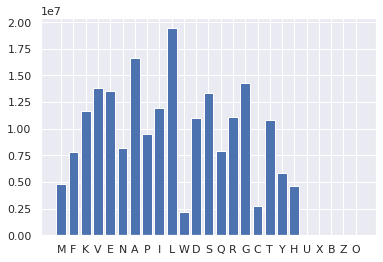

In [59]:
unique_aminos=list(count_aminos.keys())

print('Unique aminos ({}):\n{}'.format(len(unique_aminos), unique_aminos))
x=[i for i in range(len(unique_aminos))]
plt.bar(x, count_aminos.values())
plt.xticks(x, unique_aminos)
plt.show()

There are 25 unique amino acids. The first 20 are the 20 known amino acids which appear from only 2.5 million times such as Tryptophan(W) and Cysteine(C) to around 20 million times such as Alanine(A) and Leucine(L).

Interestingly, the last 5 amino acids: U, X, B, Z and O which appear 

In [61]:
print(list(count_aminos.values())[-5:])

[327, 8273, 276, 248, 28]


They describe respectively:
U: 
X: any amino acid
B: Asparagine/Aspartic Acid
Z: Glutamine/Glutamic Acid
O: 

Moving to analyze the amino acid sequences

In [68]:
print('Average length:', np.mean(length_seqs))
print('Deviation:', np.std(length_seqs))
print('Min length:', np.min(length_seqs))
print('Max length:', np.max(length_seqs))

Average length: 359.37506918185096
Deviation: 333.39939306284276
Min length: 2
Max length: 35213


In [74]:
sorted_seqs=np.array(length_seqs)
sorted_seqs.sort()
print('10 shortest:\n{}\n10 longest:\n{}'.format(sorted_seqs[:10], sorted_seqs[-10:]))

10 shortest:
[2 2 3 3 3 3 3 4 4 4]
10 longest:
[10624 10746 11103 11872 13100 14507 18141 18562 34350 35213]


In [75]:
print(len(sorted_seqs[sorted_seqs<30]))

5336


Finally, let's save:


On disk in a yaml file. These parameters are going to be used later on for hot encoding the data for training.

In [80]:
data={}
data['unique_aminos']=unique_aminos
data['max_length_aminos']=512
with open('../hyperparams.yaml', 'w') as outfile:
    yaml.dump(data, outfile)